In [1]:
import torch
import os
from torch.utils.data import Dataset
from src.data.utils.data_processing import image_to_array
from rellis_2D_dataset import Rellis2DDataset

print('hello')
BASE_DIR = os.getcwd()
print(BASE_DIR)
INPUT_DIR = os.path.join(BASE_DIR, "../../input/rellis_2d_preprocessed/test/00001")

image_files = os.listdir(f"{INPUT_DIR}/pylon_camera_node")
label_files = os.listdir(f"{INPUT_DIR}/pylon_camera_node_label_id")
rgb_images = [image_to_array(f"{INPUT_DIR}/pylon_camera_node/{image_file}") for image_file in image_files]
labels = [image_to_array(f"{INPUT_DIR}/pylon_camera_node_label_id/{label_file}") for label_file in label_files]
preloaded_data = {'rgb_images': rgb_images, 'labels': labels}
dataset = Rellis2DDataset(preloaded_data)


hello
/home/mjo24/Projects/WildSemiFusion/src/data


In [ ]:
for idx in range(len(dataset)):
    print(f"Sample {idx}: {dataset[idx]}")

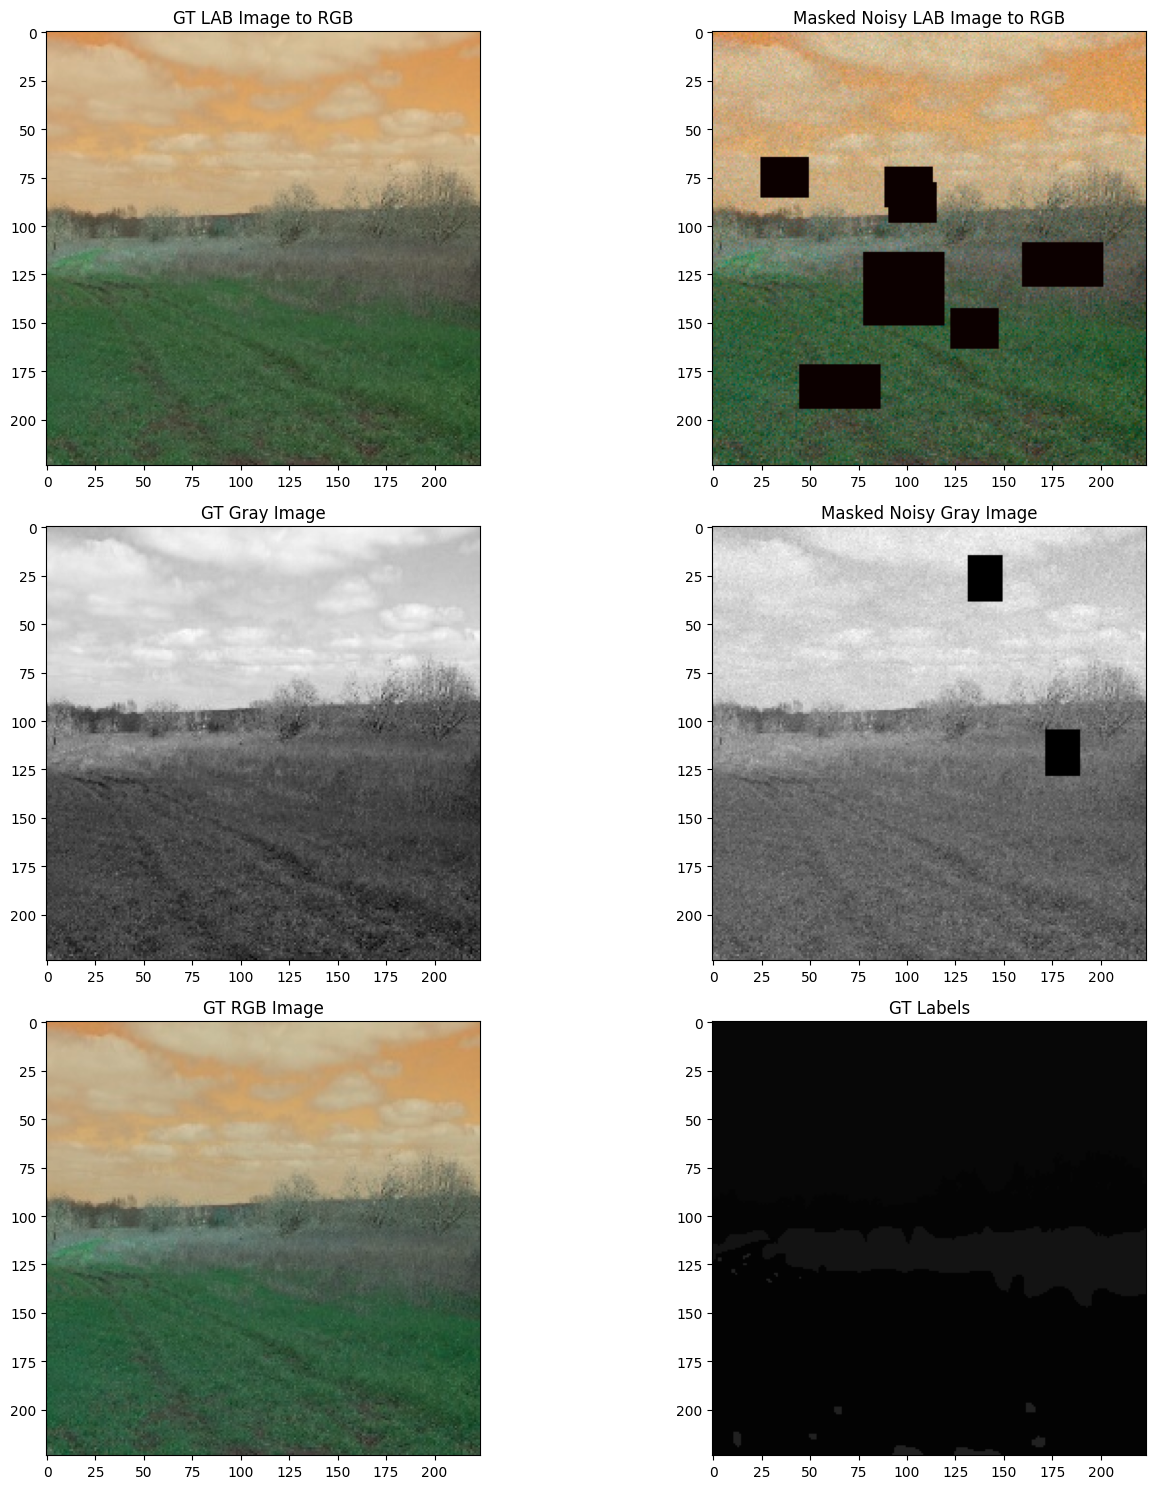

In [8]:
import matplotlib.pyplot as plt
from src.data.utils.data_processing import lab_discretized_to_rgb


count = 0 
for idx in range(len(dataset)):
    sample = dataset[idx]
    gt_gray_image = sample['gt_gray_image']

    gt_lab_image = sample['gt_lab_image']
    gt_labels = sample['gt_labels']
    masked_noisy_lab_image = sample['masked_noisy_lab_image']
    masked_noisy_gray_image = sample['masked_noisy_gray_image']
    gt_rgb = sample['gt_rgb']

    fig, axs = plt.subplots(3, 2, figsize=(15, 15))

    axs[0, 0].imshow(lab_discretized_to_rgb(gt_lab_image, 500))
    axs[0, 0].set_title('GT LAB Image to RGB')
    axs[0, 1].imshow(lab_discretized_to_rgb(masked_noisy_lab_image, 500))
    axs[0, 1].set_title('Masked Noisy LAB Image to RGB')


    axs[1, 0].imshow(gt_gray_image, cmap='gray')
    axs[1, 0].set_title('GT Gray Image')
    axs[1, 1].imshow(masked_noisy_gray_image, cmap='gray')
    axs[1, 1].set_title('Masked Noisy Gray Image')

    axs[2, 0].imshow(gt_rgb)
    axs[2, 0].set_title('GT RGB Image')
    axs[2, 1].imshow(gt_labels)
    axs[2, 1].set_title('GT Labels')

    plt.tight_layout()
    plt.show()

    break



In [3]:
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=3)

In [4]:
for i, batch in enumerate(data_loader):
    print(f"Batch {i}: {batch}")

Batch 0: {'locations': tensor([[[  0.,   0.,   0.],
         [  0.,   0.,   1.],
         [  0.,   0.,   2.],
         ...,
         [223., 223.,   0.],
         [223., 223.,   1.],
         [223., 223.,   2.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   1.],
         [  0.,   0.,   2.],
         ...,
         [223., 223.,   0.],
         [223., 223.,   1.],
         [223., 223.,   2.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   1.],
         [  0.,   0.,   2.],
         ...,
         [223., 223.,   0.],
         [223., 223.,   1.],
         [223., 223.,   2.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   1.],
         [  0.,   0.,   2.],
         ...,
         [223., 223.,   0.],
         [223., 223.,   1.],
         [223., 223.,   2.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   1.],
         [  0.,   0.,   2.],
         ...,
         [223., 223.,   0.],
         [223., 223.,   1.],
         [223., 223.,   2.]],

        [[  0